In [893]:
import pandas as pd                                     # for data manipulations
import numpy as np
import seaborn as sns                                   # for visualisation
import matplotlib.pyplot as plt                         # for visualisation
from sklearn.preprocessing import StandardScaler        # for scaling
from sklearn.model_selection import train_test_split    # train-test split data
from sklearn.feature_selection import RFE               # for feature selection

# for regression models
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold               # for k-fold cross-validation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error   # evalutaion metrics

In [894]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')  # loading the data
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [895]:
df.shape                                                # checking the shape of the data

(6704, 9)

In [896]:
df.isnull().sum()                                       # checking for null/missing values

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null/missing value is very less as compared to the total number of rows, I will be dropping these rows.

In [897]:
df.dropna(axis=0, inplace=True)                         # dropping the null values

In [898]:
df.isnull().sum()                                       # checking for null/missing values

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [899]:
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)     # dropping column

In [900]:
df.dtypes                                               # checking the data types

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [901]:
df.nunique()                                            # number of unique values in each column

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [902]:
df['Job Title'].unique()                                # unique values in 'Job Title' column

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [903]:
df['Education Level'].unique()                          # unique values in 'Education Level' column

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [904]:
df['Gender'].unique()                                   # unique values in 'Gender' column

array(['Male', 'Female', 'Other'], dtype=object)

In [905]:
df['Country'].unique()                                  # unique values in 'Country' column

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [906]:
def categorize_job_title(job_title):                    # function to categorise job titles
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data entry' in job_title :
        return 'Data Entry'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'ceo' in job_title:
        return 'CEO'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title:
        return 'Marketing'
    elif 'social media' in job_title:
        return 'Social Media'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    elif 'project coordinator' in job_title:
        return 'Project Coordinator'
    elif 'project engineer' in job_title:
        return 'Project Engineer'
    elif 'consultant' in job_title:
        return 'Consultant'
    elif 'full stack' in job_title:
        return 'Full Stack Engineer'
    elif 'driver' in job_title:
        return 'Driver'
    elif 'recruiter' in job_title:
        return 'Recruiter'
    elif 'designer' in job_title:
        return 'Product/Graphic Designer'
    elif 'business development associate' in job_title:
        return 'Business Development Associate'
    else:
        return 'Other'

df['Job Title New'] = df['Job Title'].apply(categorize_job_title)   # apply the categorised job title and create a new column

In [1048]:
def group_education(education):                                     # categorise the education level

    education = str(education).lower()
    if 'high school' in education:
        return 'High School'
    elif 'bachelors' in education:
        return 'Bachelors'
    elif 'bachelor\'s' in education:
        return 'Bachelors'
    elif 'masters' in education:
        return 'Masters'
    elif 'master\'s' in education:
        return 'Masters'
    elif 'phd' in education:
        return 'PhD'

df['Education Level New'] = df['Education Level'].apply(group_education)    # apply the categorised education level and create a new column

In [908]:
df.describe()                                                       # get the summary, includong mean and standard deviation of numerical value columns

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Job Title

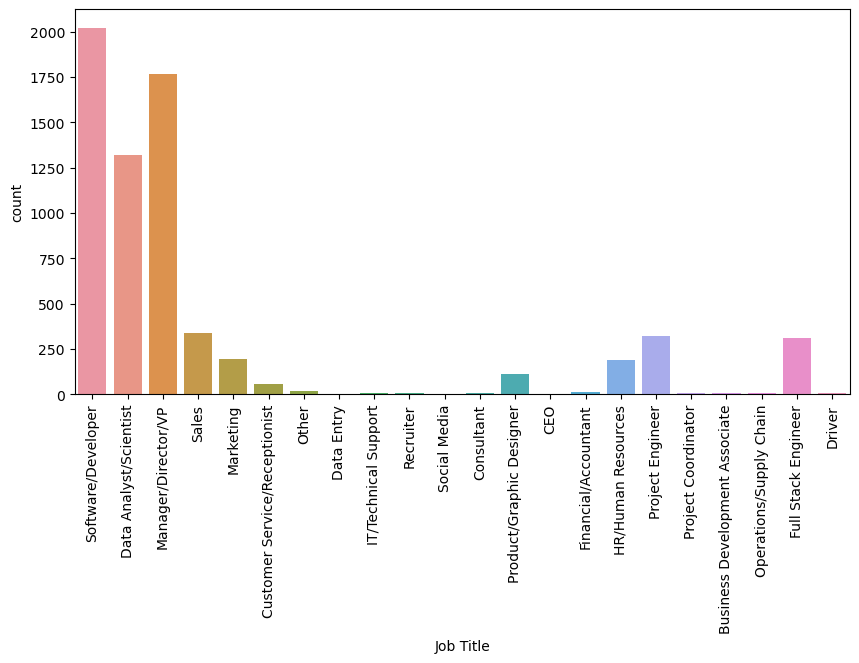

In [913]:
plt.figure(figsize=(10,5))                                          # graph to show the job title distribution
sns.countplot(x='Job Title New', data = df)
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.show()

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/VP. A few amount of employees have job titles such as Sales,Marketing, Project Engineer, HR, Product Designer, Full Stack Engineer and Customer Service. Very few of the employees work as a Financial/accountant, CEO, Recruiter, IT Support or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

### Job Title and Salary

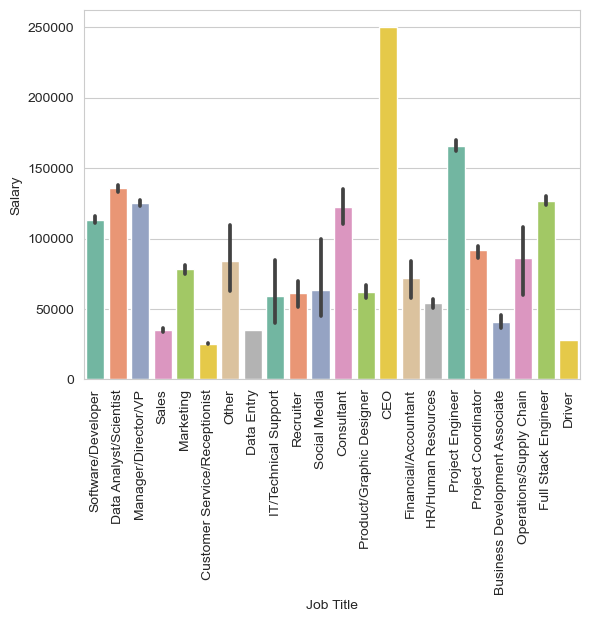

In [1024]:
sns.barplot(x = 'Job Title New', y = 'Salary', data = df, palette = 'Set2') # graph to show the Job Title v/s Salary trend
plt.xlabel('Job Title')
plt.xticks(rotation = 90)
plt.show()

In this graph, obviously 'CEO' job titles has higher salary than all the other titles. This graph falsifies my previous hypothesis regarding the demand and pay with respect to the job titles. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/Scientist and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Consultant, Full Stack Engineer, Operation/Supply Chain are found have much more salary as assumed.

### Experience and Salary

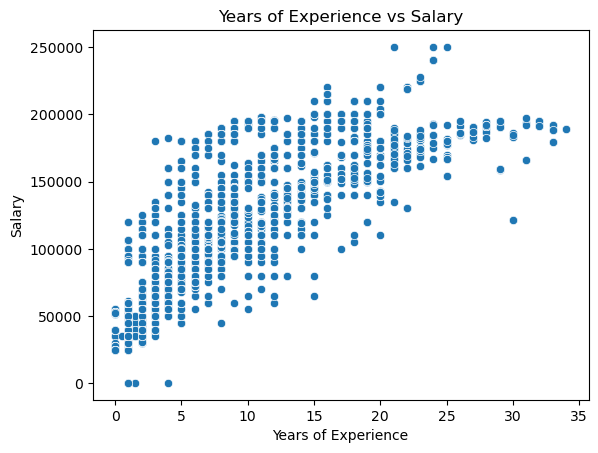

In [921]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary') # graph to show the Experience v/s Salary trend
plt.show()

Obviously, salary has an increasing trend with respect to the increase in experience. But, if you look closely, it is obvious that, people with similar experience have difference in their salary. So, we can conclude that salary depends on other features as well.

### Country and Salary

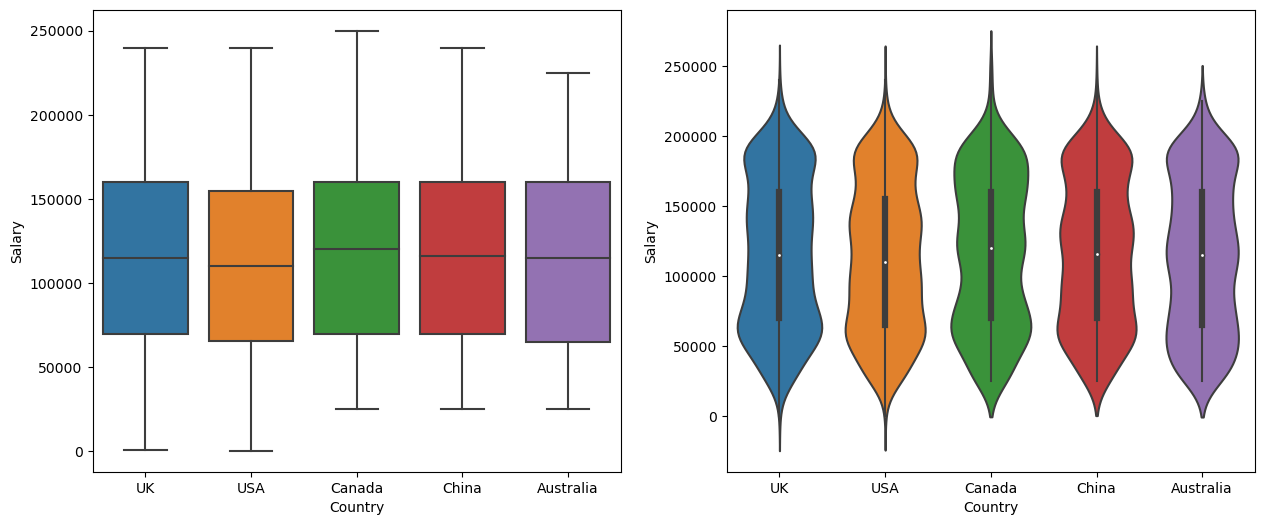

In [922]:
fig,ax = plt.subplots(1,2,figsize=(15,6))               # graph to show the Country v/s Salary trend
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])
plt.show()

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

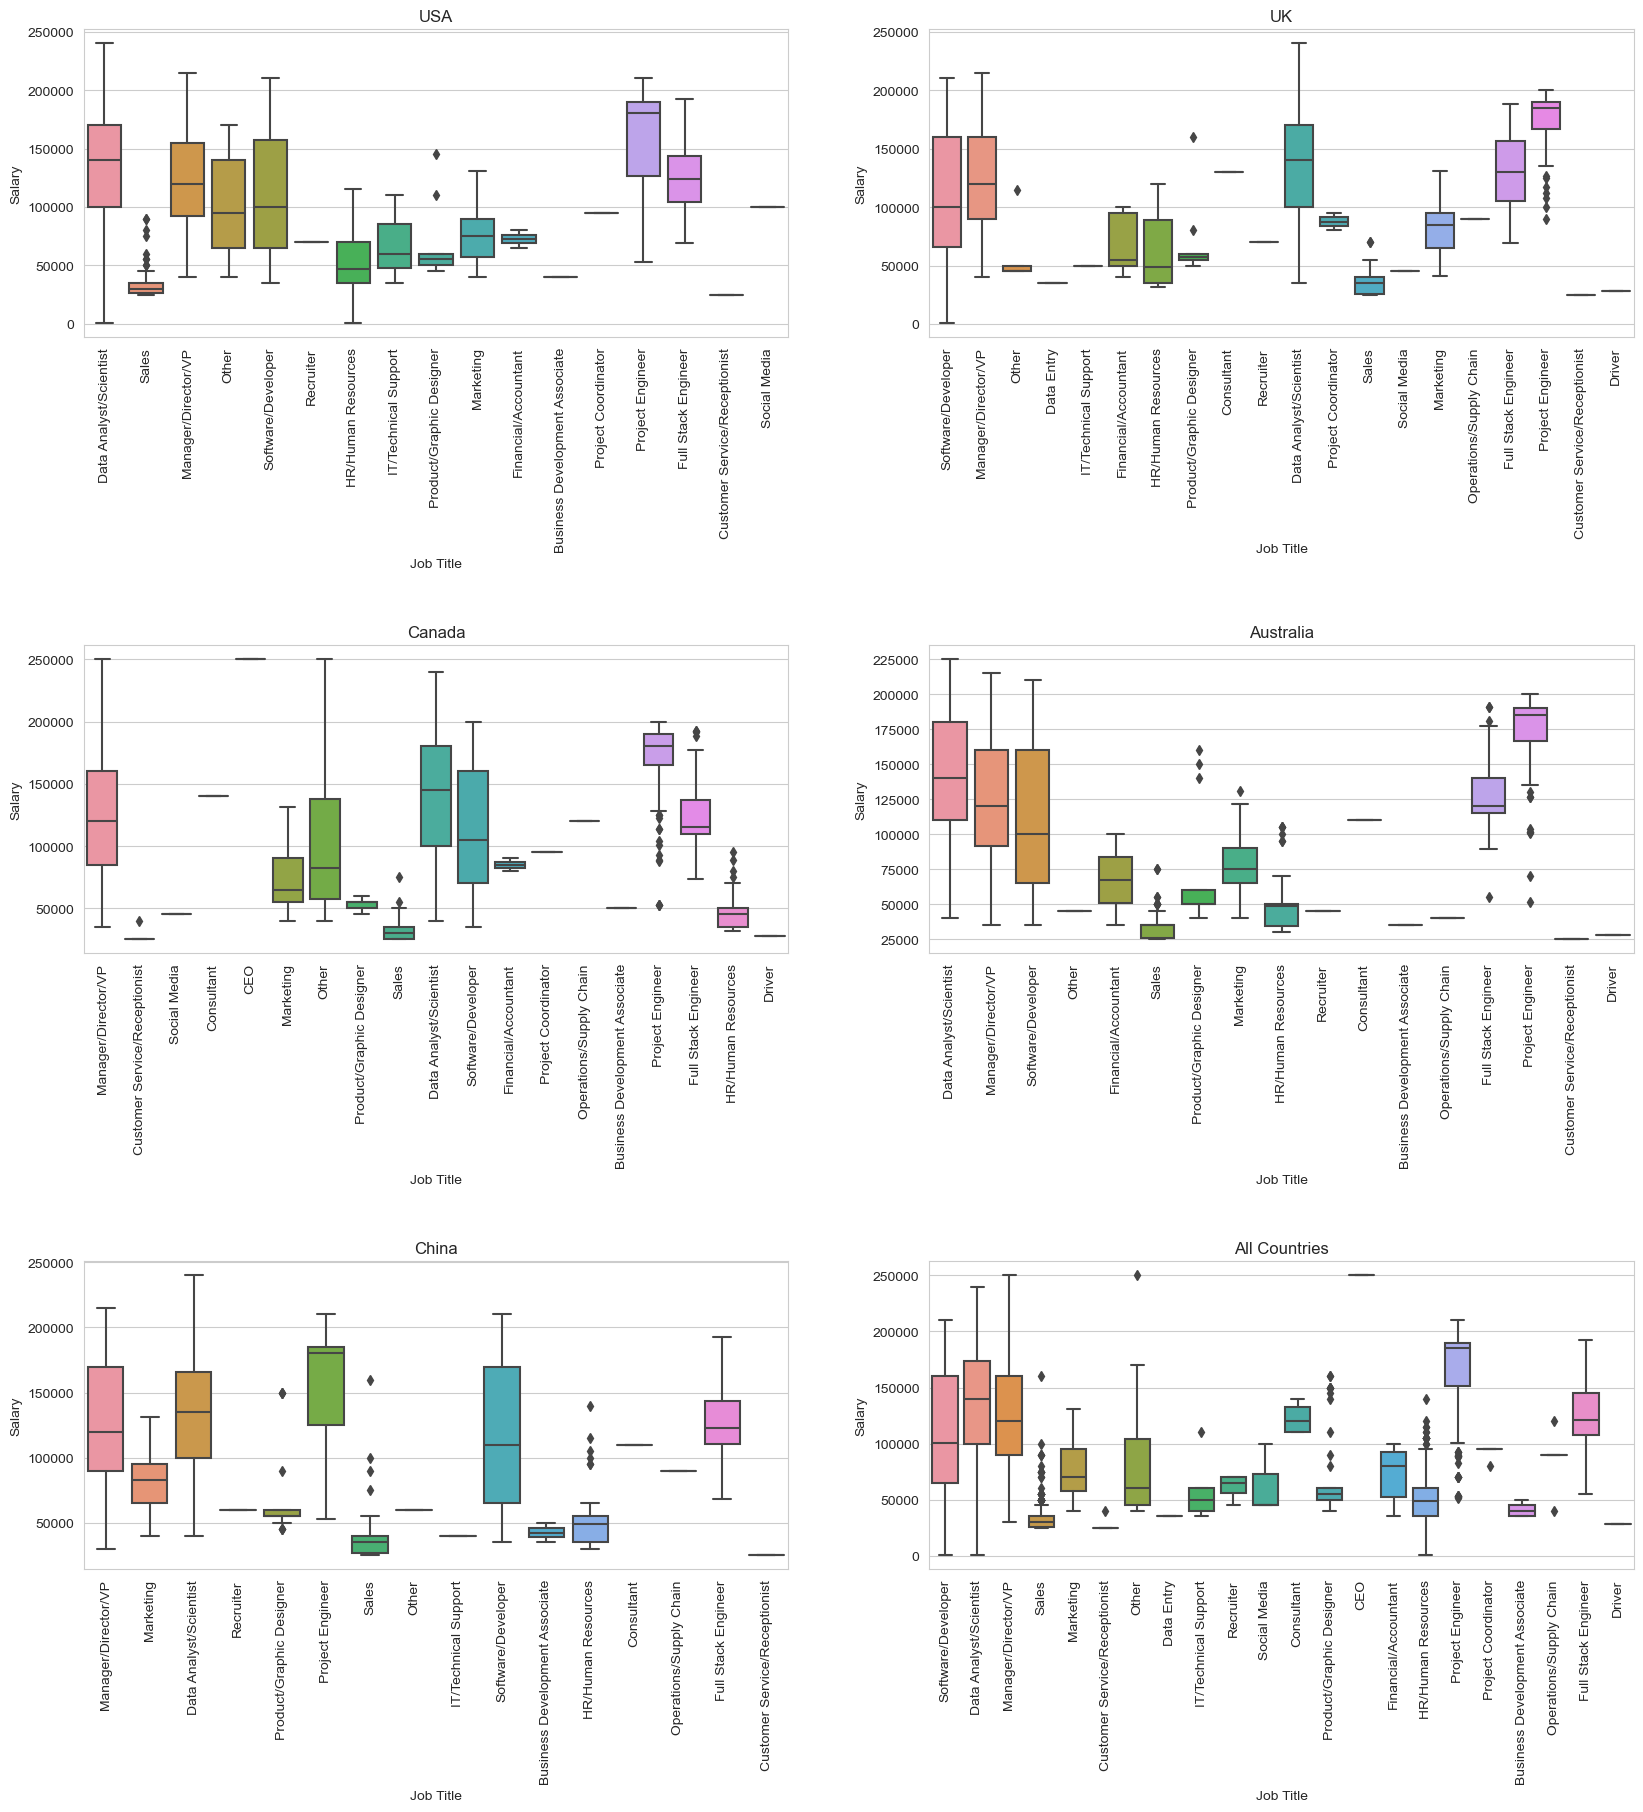

In [1022]:
fig,ax = plt.subplots(3,2,figsize=(20,20))              # graph to show the Job Title v/s Salary for each country
plt.subplots_adjust(hspace=1.0)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title New', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)
plt.setp(ax[-1, :], xlabel='Job Title')
plt.setp(ax[0, :], xlabel='Job Title')
plt.setp(ax[1, :], xlabel='Job Title')
plt.show()

If you look closely in this graph, you can see that some job titles do not have much difference in the average salary across different countries, but the jobs that are coming under Social Media category, for example, has less salary in the UK and Canada than in the US, Consultant has very less salary in Australia than in Canada and so on. There can be a number of reasons for this change in pay scale. It can depend on the economic conditions of the particular country, the demand of the job, the experience and education level of the people working for that job title, etc.

### Data Preprocessing

#### Label encoding to categorical features

In [985]:
def feature_engineering(df):                            # function to perform feature engineering
    df['Job Title'] = df['Job Title'].apply(categorize_job_title)   # categorise job title
    df['Education Level'] = df['Education Level'].apply(group_education)    # categorise education level
    df.Gender = df.Gender.map({'Male':0, 'Female':1, 'Other':2, 'male':0, 'female':1, 'other':2})   # label genders
    df.Country = df.Country.map({'UK':0, 'USA':1, 'Canada':2, 'China':3, 'Australia':4, 'uk':0, 'usa':1, 'canada':2, 'china':3, 'australia':4}) # label country
    df['Education Level'] = df['Education Level'].map({'Bachelors':1, 'Masters':2, 'PhD':3, 'High School':0, 'Other':4})    # label categorised education level
    df['Job Title'] = df['Job Title'].map({'Software/Developer':0, 'Data Entry':1, 'Data Analyst/Scientist':2, 'Manager/Director/VP':3,
                                           'CEO':4, 'Sales':5, 'Marketing':6, 'Social Media':7, 'HR/Human Resources':8, 'Financial/Accountant':9,
                                           'Project Manager':10, 'IT/Technical Support':11, 'Operations/Supply Chain':12, 'Customer Service/Receptionist':13,
                                           'Project Coordinator':14, 'Project Engineer':15, 'Consultant':16, 'Full Stack Engineer':17, 'Driver':18,
                                           'Recruiter':19, 'Product/Graphic Designer':20, 'Business Development Associate':21, 'Other':22}) # label categorised job title
    df.Race = df.Race.map({'White':0, 'Hispanic':1, 'Asian':2, 'Korean':3, 'Chinese':4, 'Australian':5, 'Welsh':6, 'African American':7, 'Mixed':8,
                           'Black':9,'Other':10,'white':0, 'hispanic':1, 'asian':2, 'korean':3, 'chinese':4, 'australian':5, 'welsh':6,
                           'african American':7, 'african american':7, 'mixed':8, 'black':9,'other':10})    # label race
    return df

In [986]:
def scaling_function(df):                           # function to perform scaling
    scaler = StandardScaler()
    scaler = scaler.fit(df[['Age', 'Years of Experience']])
    df[['Age', 'Years of Experience']] = scaler.transform(df[['Age', 'Years of Experience']])
    return scaler, df

#### Correlation

/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/2169480615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


<Axes: >

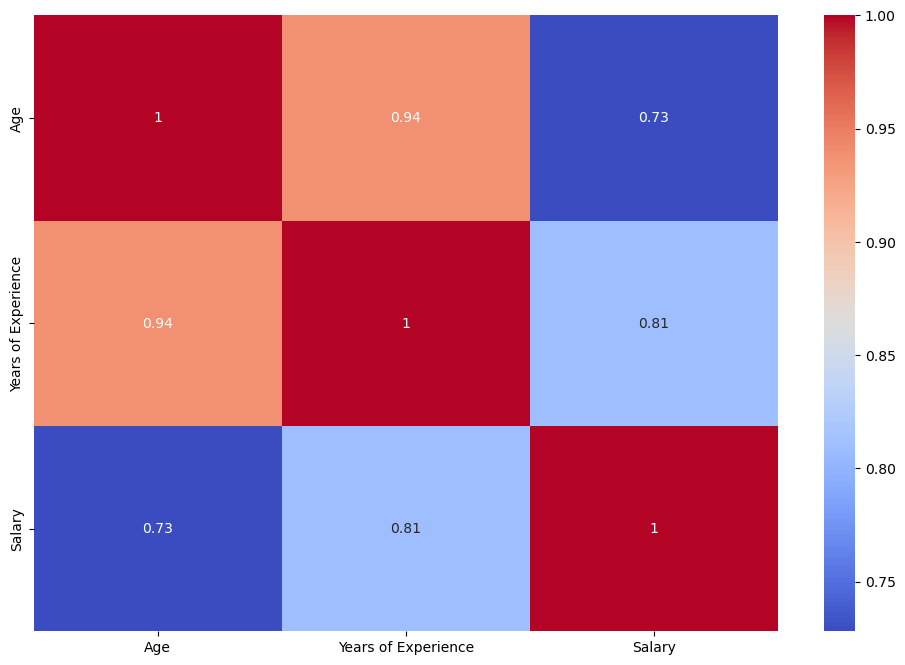

In [927]:
plt.figure(figsize=(12,8))                          # plot the correlation matrix
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In this coorelation matrix, there are three major coorealtions.

   * Salary and Age
   * Salary and Years of Experience
   * Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

### Train Test Split

In [1025]:
X = df.drop(columns=['Job Title New', 'Education Level New', 'Salary']) # dropping the target column, and two newly created columns
y = df['Salary']                                                        # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # splitting the data to train and test data

In [1026]:
X_train_fe = feature_engineering(X_train)                               # perform feature engineering for train data
X_train_fe.head()                                                       # print the first five rows of train dataframe

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
3426,39.0,0,2,8,10.0,1,2
1552,38.0,1,2,0,10.0,0,2
6021,35.0,1,3,3,12.0,2,9
4461,30.0,1,0,5,1.0,0,8
3286,23.0,1,1,0,1.0,4,5


In [1027]:
scaler, X_train_fe = scaling_function(X_train_fe)                       # perform scaling for train data

In [1028]:
X_train_fe.head()                                                       # print the first five rows of train dataframe

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
3426,0.707334,0,2,8,0.315738,1,2
1552,0.575653,1,2,0,0.315738,0,2
6021,0.180612,1,3,3,0.648068,2,9
4461,-0.477790,1,0,5,-1.179746,0,8
3286,-1.399553,1,1,0,-1.179746,4,5


<Axes: >

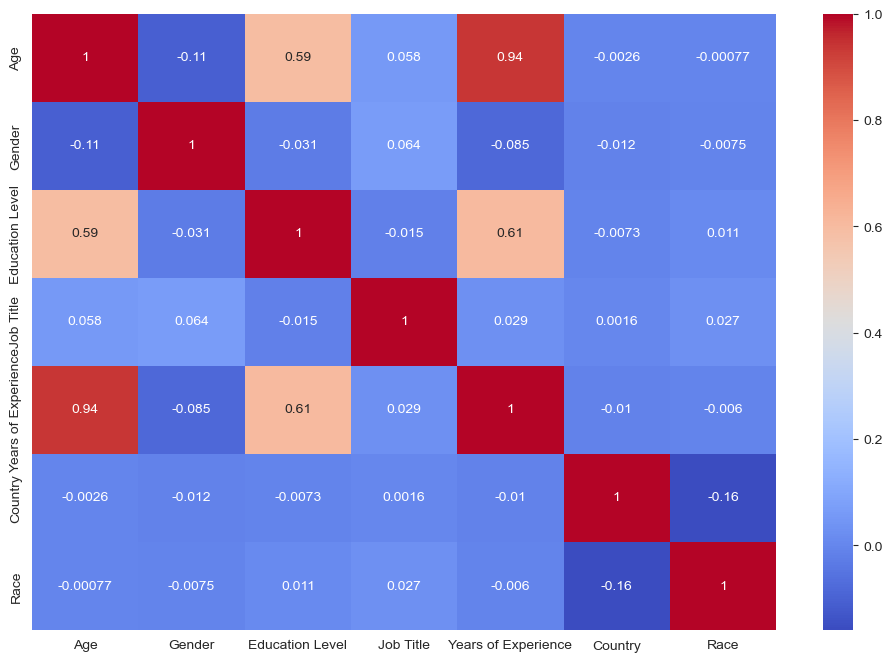

In [1029]:
plt.figure(figsize=(12,8))                                              # plot the correlation matrix
sns.heatmap(X_train_fe.corr(),annot=True, cmap='coolwarm')

### Linear Regression

In [1030]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{'n_features_to_select': list(range(1, 8))}]
lr = LinearRegression()             # calling the model
lr.fit(X_train_fe, y_train)         # fitting the model on train data
rfe = RFE(lr)                       # implementing the feature selection in linear regression
model_cv = GridSearchCV(estimator = rfe,    # performing Grid search with the given hyperparameters
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)
model_cv.fit(X_train_fe, y_train)   # fitting the model on train data

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

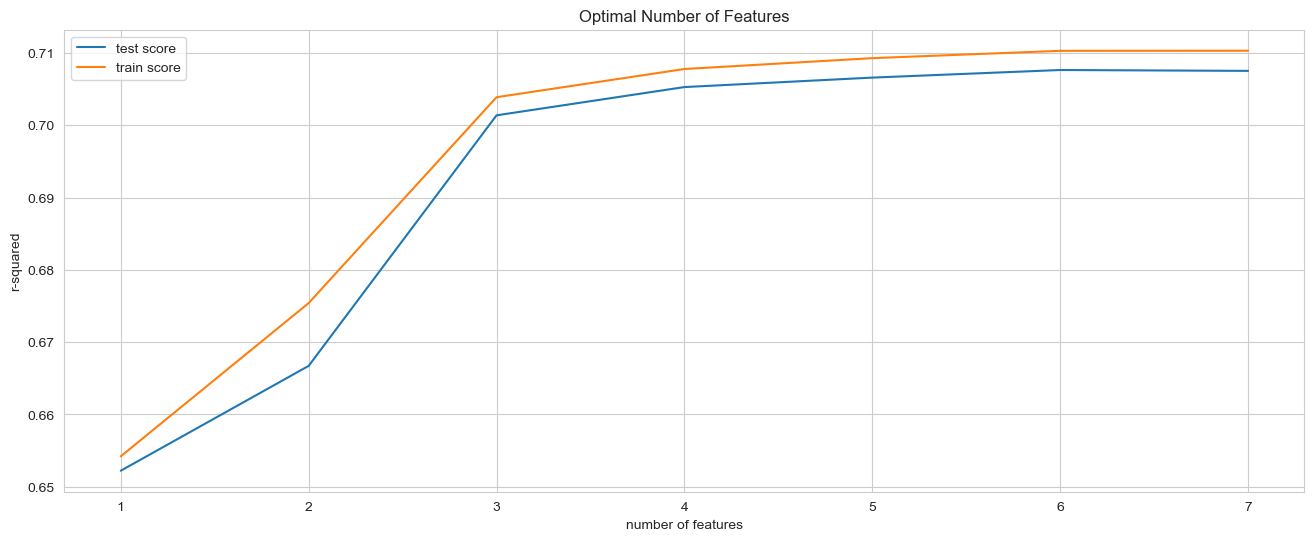

In [1031]:
cv_results = pd.DataFrame(model_cv.cv_results_) # converting the results to a dataframe
plt.figure(figsize=(16,6))                      # plotting the train and test score
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

Optimal number of features for prediction is 6

In [1032]:
n_features_optimal = 6
rfe = RFE(lr, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train_fe, y_train)      # fitting the model which takes 6 features on train data

In [1033]:
X_test_fe = feature_engineering(X_test) # feature engineer the test data

In [1034]:
X_test_fe.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1883,36.0,0,2,0,9.0,3,0
2630,27.0,1,2,0,4.0,4,0
498,25.0,1,2,2,1.0,3,3
5973,28.0,1,1,2,3.0,4,5
4108,29.0,0,1,0,5.0,4,2


In [1035]:
X_test_fe[['Age', 'Years of Experience']] = scaler.transform(X_test_fe[['Age', 'Years of Experience']]) # scale the test data based on train data scaler
X_test_fe.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1883,0.312293,0,2,0,0.149573,3,0
2630,-0.872832,1,2,0,-0.681251,4,0
498,-1.136192,1,2,2,-1.179746,3,3
5973,-0.741151,1,1,2,-0.847416,4,5
4108,-0.609471,0,1,0,-0.515087,4,2


In [1036]:
y_pred = rfe.predict(X_test_fe)     # predict on the test data
r2 = r2_score(y_test, y_pred)
print(r2)                           # print r2 score

0.7128392929802443


In [1037]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) # print rmse

RMSE: 28615.15426925727


### Decision Tree Regressor

In [941]:
dtree = DecisionTreeRegressor()                             # calling the model

In [942]:
parameters = {'max_depth' :[2,4,6,8,10],                    # setting the hyperparameters
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[42]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
#creating the grid search object
grid_search = GridSearchCV(estimator=dtree,                 # performing Grid search with the given hyperparameters
                           param_grid=parameters,
                           cv=folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train_fe,y_train)                         # fitting the model on train data

/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, expli

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [943]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [944]:
dtree = DecisionTreeRegressor(max_depth = 8, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, random_state = 42) # creating decision tree model with best parameters
dtree.fit(X_train_fe,y_train)                                       # fitting the model on train data
dtree.score(X_train_fe, y_train)

/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


0.9383434961160209

In [945]:
d_pred = dtree.predict(X_test_fe)                                   # predicting on the test data
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})         # converting the actual and predicted values to a dataframe
dft.head(10)

,Actual,Predicted
1883,150000.0,136337.254717
2630,75969.0,82011.142857
498,100000.0,93722.222222
5973,60000.0,60933.333333
4108,80000.0,95411.764706
1041,190000.0,183261.969072
4848,72000.0,76608.695652
6617,55000.0,59457.627119
1086,195000.0,197477.272727
5530,130000.0,132311.466667


In [946]:
print("R2 Score: ", r2_score(y_test, d_pred))                       # printing results
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9234501047726016
Mean Squared Error:  218278906.72216597
Mean Absolute Error:  8796.561019178022
RMSE: 14774.265014618019


/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/3409737775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/3409737775.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please

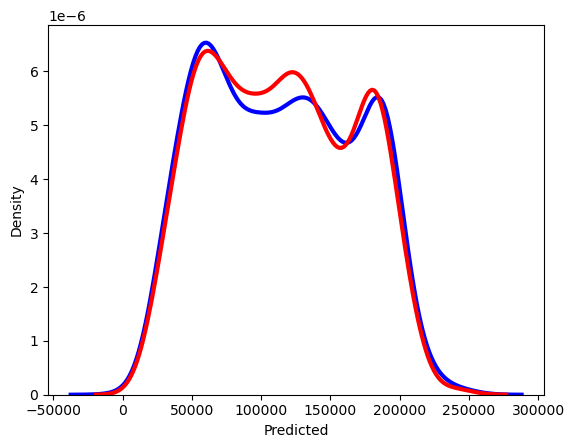

In [947]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')    # plotting the actual and predicted values
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')
plt.show()

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

### Random Forest Regressor

In [948]:
rfg = RandomForestRegressor()                                       # calling the model

In [949]:
rfg_parameters = {'n_estimators': [25, 50, 100, 150],               # setting the hyperparameters
              'max_depth': [1, 2, 3, 4, 5],
              'random_state' :[42]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
#creating the grid search object
grid_rfg = GridSearchCV(estimator=rfg,                              # performing Grid search with the given hyperparameters
                           param_grid=rfg_parameters,
                           cv=folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

#fit the grid search object to the training data
grid_rfg.fit(X_train_fe,y_train)                                    # fitting the model on train data

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 150],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [950]:
print(grid_rfg.best_params_)

{'max_depth': 5, 'n_estimators': 50, 'random_state': 42}


In [1038]:
rfg = RandomForestRegressor(max_depth = 8, n_estimators=50, random_state = 42)  # calling random forest regressor with the best parameters
rfg.fit(X_train_fe, y_train)                                        # fitting the model on train data
rfg.score(X_train_fe, y_train)

0.952376654278259

In [1039]:
r_pred = rfg.predict(X_test_fe)                                     # predict on the test data
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})         # converting the actual and predicted values to a dataframe
dfr.head(10)

,Actual,Predicted
1883,150000.0,139569.060263
2630,75969.0,99466.808441
498,100000.0,92884.418015
5973,60000.0,60237.046322
4108,80000.0,88829.144370
1041,190000.0,190552.562447
4848,72000.0,77603.449382
6617,55000.0,58903.073467
1086,195000.0,197141.819651
5530,130000.0,130366.851538


In [1040]:
print("R2 Score: ", r2_score(y_test, r_pred))                       # printing the evaluation metrics
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9367055914579858
Mean Squared Error:  180481426.61901486
Mean Absolute Error:  8222.71819742781
RMSE: 13434.337595096189


/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/3960694215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/3960694215.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please

<Axes: xlabel='Predicted', ylabel='Density'>

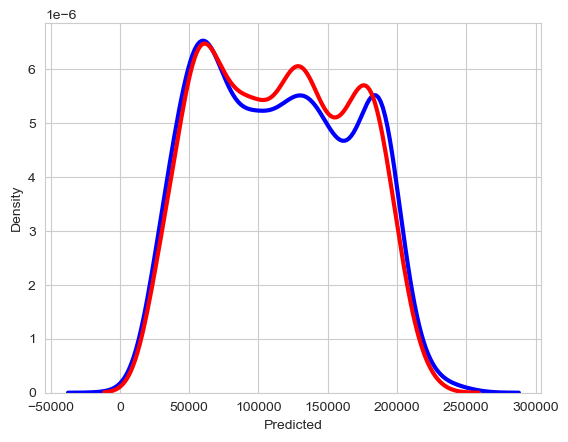

In [1041]:
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')    # plotting the actual and predicted values
sns.distplot(dfr['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

### Lasso Regressor

In [956]:
lasso_r = Lasso()                                                   # calling the model

In [957]:
lasso_params = {'alpha':[0.05, 0.10, 0.5, 1, 5]}                    # setting the hyperparameters
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
#creating the grid search object
grid_lasso = GridSearchCV(estimator=lasso_r,                        # performing Grid search with the given hyperparameters
                        param_grid=lasso_params,
                        cv=folds,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)

#fit the grid search object to the training data
grid_lasso.fit(X_train_fe,y_train)                                  # fitting the model on train data

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.5, 1, 5]},
             scoring='neg_mean_squared_error')

In [958]:
print(grid_lasso.best_params_)

{'alpha': 5}


In [959]:
lasso_r = Lasso(alpha=5, random_state = 42)                         # creating lasso regressor with best parameters
lasso_r.fit(X_train_fe,y_train)                                     # fitting the model on train data
lasso_r.score(X_train_fe, y_train)

0.7100966666652355

In [960]:
lasso_pred = lasso_r.predict(X_test_fe)                             # predict on the test data
dfl = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})     # converting the actual and predicted values to a dataframe
dfl.head(10)

,Actual,Predicted
1883,150000.0,128990.590337
2630,75969.0,101414.188929
498,100000.0,79605.704055
5973,60000.0,74656.665654
4108,80000.0,96125.301126
1041,190000.0,122275.926172
4848,72000.0,95987.083897
6617,55000.0,76244.876132
1086,195000.0,143962.191586
5530,130000.0,126953.352674


In [961]:
print("R2 Score: ", r2_score(y_test, lasso_pred))                   # printing the evaluation metrics
print("Mean Squared Error: ", mean_squared_error(y_test, lasso_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lasso_pred)))

R2 Score:  0.7129082898135731
Mean Squared Error:  818630312.1948762
Mean Absolute Error:  22412.62312603075
RMSE: 28611.716344792672


### XGBRegressor

In [968]:
xgbr = XGBRegressor()                                               # calling the model

In [969]:
xgb_params = {"learning_rate": (0.05, 0.10, 0.15),                  # setting the hyperparameters
              "max_depth": [ 3, 4, 5, 6, 8],
              "min_child_weight": [ 1, 3, 5, 7],
              "gamma":[ 0.0, 0.1, 0.2],
              "colsample_bytree":[ 0.3, 0.4]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

grid_xgb = GridSearchCV(estimator=xgbr,                             # performing Grid search with the given hyperparameters
                          param_grid=xgb_params,
                          cv=folds,
                          scoring='r2')

grid_xgb.fit(X_train_fe,y_train)                                    # fitting the model on train data

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': (0.05, 0.1, 0.15),
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='r2')

In [970]:
grid_xgb.best_score_

0.9017991958120547

In [971]:
grid_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [972]:
xgb_pred = grid_xgb.predict(X_test_fe)                              # predict on the test data
dfrx = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})      # converting the actual and predicted values to a dataframe
dfrx.head(10)

,Actual,Predicted
1883,150000.0,135752.343750
2630,75969.0,116611.828125
498,100000.0,93700.101562
5973,60000.0,73489.625000
4108,80000.0,88165.945312
1041,190000.0,180838.562500
4848,72000.0,80954.000000
6617,55000.0,66418.546875
1086,195000.0,186779.687500
5530,130000.0,127169.531250


In [973]:
print("R2 Score: ", r2_score(y_test, xgb_pred))                     # printing the evaluation metrics
print("Mean Squared Error: ", mean_squared_error(y_test, xgb_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred)))

R2 Score:  0.9007955669710717
Mean Squared Error:  282877398.05810255
Mean Absolute Error:  11722.77037371735
RMSE: 16818.959482028087


### Ensemble model

In [975]:
def get_models():                                                   # function to select the models for ensemble model
    models = list()
    models.append(('dt', dtree))
    models.append(('rf', rfg))
    models.append(('xgb', grid_xgb))
    return models

In [976]:
scores = [(r2_score(y_test, d_pred)), (r2_score(y_test, r_pred)), (r2_score(y_test, xgb_pred))]     # get the scores of each models

In [977]:
X_test.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1883,0.312293,0,2,0,0.149573,3,0
2630,-0.872832,1,2,0,-0.681251,4,0
498,-1.136192,1,2,2,-1.179746,3,3
5973,-0.741151,1,1,2,-0.847416,4,5
4108,-0.609471,0,1,0,-0.515087,4,2


In [982]:
# create the ensemble
ensemble = VotingRegressor(estimators=get_models(), weights=scores)                                # ensemble the models with weighted average
ensemble.fit(X_train_fe, y_train)                                   # fit on the train data
yhat = ensemble.predict(X_test_fe)                                  # predict on the test data
score = r2_score(y_test, yhat)
rmse_score = np.sqrt(mean_squared_error(y_test, yhat))
print('Weighted Avg R2: %.3f' % (score))                            # print evaluation metrics
print('Weighted Avg RMSE: %.3f' % (rmse_score))

/Users/gopikasuresh/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Weighted Avg R2: 0.933
Weighted Avg RMSE: 13802.608


In [1042]:
dfens = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})         # converting the actual and predicted values to a dataframe
dfens.head(10)

,Actual,Predicted
1883,150000.0,137242.871978
2630,75969.0,99222.226621
498,100000.0,93430.763952
5973,60000.0,64793.754948
4108,80000.0,90814.443691
1041,190000.0,184944.775192
4848,72000.0,78363.895876
6617,55000.0,61540.573032
1086,195000.0,193873.240213
5530,130000.0,129974.096725


/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/1899302734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfens['Actual'], color='blue', hist=False, kde=True, kde_kws={'linewidth': 3}, label='Actual')
/var/folders/pp/95sc27k12dvcdwpm8340mb7w0000gn/T/ipykernel_69323/1899302734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
htt

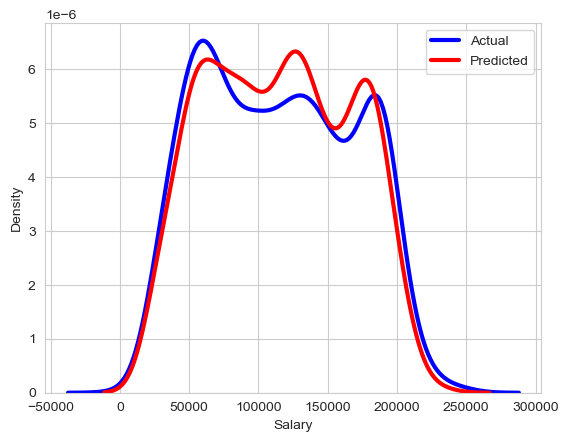

In [1047]:
ax = sns.distplot(dfens['Actual'], color='blue', hist=False, kde=True, kde_kws={'linewidth': 3}, label='Actual')    # plotting the actual and predicted values
sns.distplot(dfens['Predicted'], color='red', ax=ax, hist=False, kde=True, kde_kws={'linewidth': 3}, label = 'Predicted')
plt.xlabel('Salary')
ax.legend()
plt.show()

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted curve coincides with the actual values curve for lower and higher values, but is more far apart for the values in mid-range. So, the assumption is that this model works best for predicting the lower and higher range salaries.

### Function to take the inputs from the user

In [1004]:
def input_values(scaler, ensemble):
    feature_cols = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']
    list1=[]
    a = input('Enter your age')
    list1.append(a)
    a = input('Enter your Gender\nMale\nFemale\nOther')
    list1.append(a)
    a = input('Enter your Education Level\nHigh School\nBachelors\nMasters\nPhD')
    list1.append(a)
    a = input('Enter your Job Title')
    list1.append(a)
    a = input('Enter your years of experience')
    list1.append(a)
    a = input('Enter your Country\nUK\nUSA\nChina\nAustralia\nCanada')
    list1.append(a)
    a = input('Enter your Race\nWhite\nHispanic\nAsian\nKorean\nChinese\nAustralian\nWelsh\nAfrican American\nMixed\nBlack\nOther')
    list1.append(a)
    df = pd.DataFrame([list1],columns=feature_cols)     # Creating a Dataframe from the list of inputs
    df_fe = feature_engineering(df)
    df_fe[['Age', 'Years of Experience']] = scaler.transform(df_fe[['Age', 'Years of Experience']])  # Scaling the inputs to fit the model scaling
    df_new = pd.DataFrame(df_fe,columns=feature_cols)
    final_pred = ensemble.predict(df_new)               # predict on the input values
    return final_pred[0]

In [1062]:
input_values(scaler, ensemble)

111587.97675022822